# Claim Frequency  Model

`Poisson Regression is used for Predicting Claim Frequency`

Given the historical data over a population of policyholders, `Poisson Regression` predicts the expected frequency of claims, following car accidents, for a new policyholder 

####  Useful Definitions
`Claim Frequency` :
$$
\rm{ Claim \ Frequency} =  \frac{\rm{Number \ of \ Claims}}{\rm{Amount \ of \ Exposure}}
$$


`Claim Severity` :
$$
\rm{ Claim \ Severity} =  \frac{\rm{Amount \ of \ Claim}}{\rm{Number \ of \ Claims}}
$$


`Pure Premium` :
$$
\rm{ Pure \ Premium} =  \frac{\rm{Amount \ of \ Claim}}{\rm{Amount \ of \ Exposure}}
$$


`Charged Premium` :
$$
\rm{Charged \ Premium} = \rm{ Pure \ Premium} +  \rm{All \ Other \ Expenses}
$$

####  Dataset  
https://www.openml.org/search?type=data&sort=runs&id=41214&status=active

https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html

---

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

---

## Part  1
#### Reading Data

In [4]:
from sklearn.datasets import fetch_openml

#### `Frequency Data`

In [5]:
data_fre = fetch_openml(data_id=41214, as_frame=True, parser='auto')

In [6]:
# data_fre['data']
# data_fre['target']
# data_fre['frame']
# data_fre['feature_names']

In [7]:
df_fre = data_fre['data']

In [8]:
df_fre.head(3)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,'Regular',1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,'Regular',1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,'Diesel',54,R22


In [9]:
df_fre.shape

(678013, 12)

In [10]:
len( df_fre.IDpol.unique() )

678013

####  `Severity Data`

In [11]:
data_sev = fetch_openml(data_id=41215, as_frame=True, parser='auto')

In [12]:
df_sev = data_sev['data']

In [13]:
df_sev.head(3)

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11


In [14]:
df_sev.shape

(26639, 2)

In [15]:
len( df_sev.IDpol.unique() )

24950

In [16]:
_fre_ = df_fre.copy()
_fre_['IDpol'] = _fre_['IDpol'].astype('int')
_fre_ = _fre_.set_index('IDpol', inplace=False)

In [17]:
_sev_ = df_sev.copy()
_sev_['IDpol'] = _sev_['IDpol'].astype('int')
_sev_ = _sev_.groupby(by=['IDpol'], as_index=True).agg({'ClaimAmount':'sum'})

##  Part 2 
#### Data Analysis

In [18]:
df_fre['Frequency'] = df_fre['ClaimNb'] / df_fre['Exposure']

print(f"Average Claim Frequency : {round(np.average(df_fre.Frequency, weights=df_fre.Exposure),6) }")

Average Claim Frequency : 0.100703


In [19]:
frac = 100 * df_fre.loc[df_fre['ClaimNb']==0, 'Exposure'].sum()/df_fre['Exposure'].sum()
print(f"Fraction of Exposure with Zero Claims : { round(frac,2)}")

Fraction of Exposure with Zero Claims : 93.9


Claim and Exposure Properties 

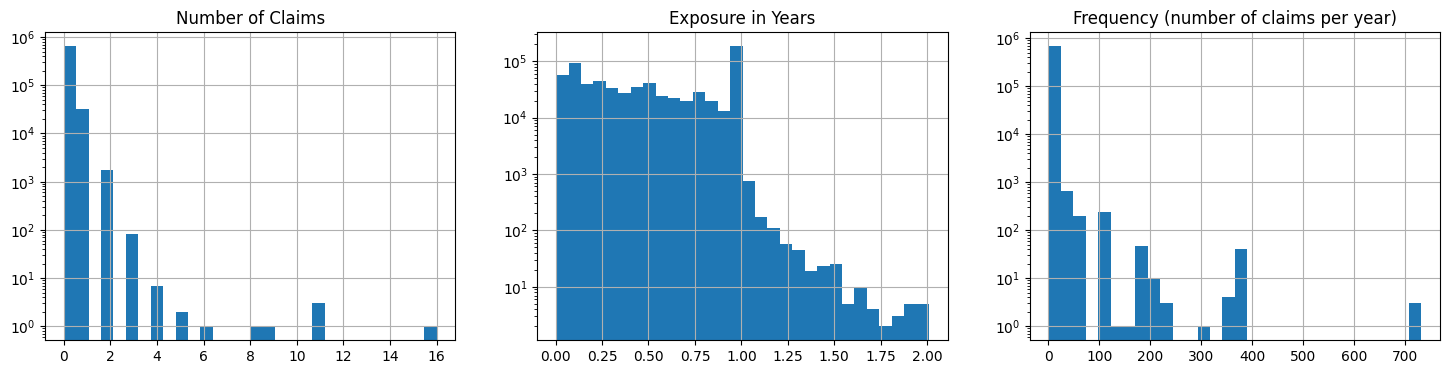

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

ax0.set_title("Number of Claims")
_ = df_fre["ClaimNb"].hist(bins=30, log=True, ax=ax0)

ax1.set_title("Exposure in Years")
_ = df_fre["Exposure"].hist(bins=30, log=True, ax=ax1)

ax2.set_title("Frequency (number of claims per year)")
_ = df_fre["Frequency"].hist(bins=30, log=True, ax=ax2)

plt.show()

Location Properties 

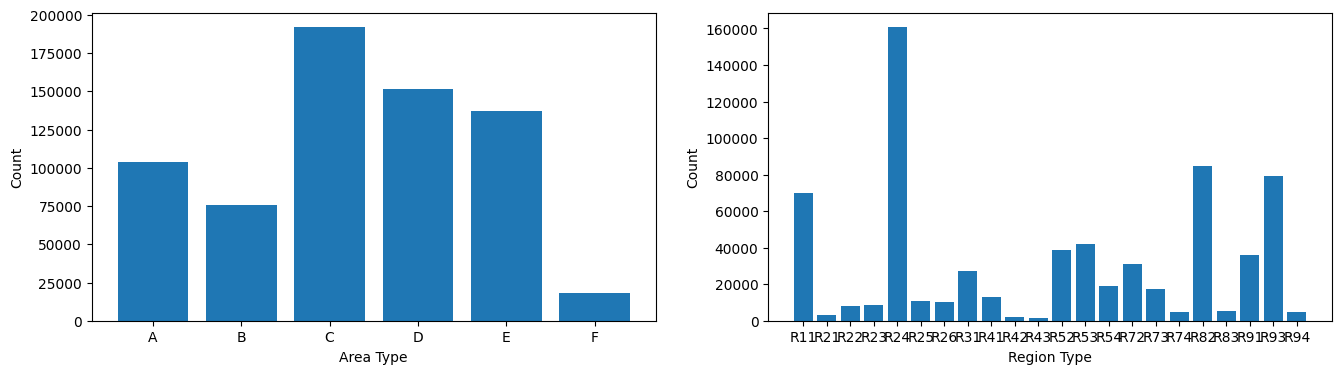

In [21]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

area = data_fre.data.groupby(by=['Area'], as_index=False).size()
area = area.rename(columns={'size':'Count'})
ax0.bar(area.Area, area.Count)
ax0.set_xlabel( 'Area Type' )
ax0.set_ylabel( 'Count' )

area = data_fre.data.groupby(by=['Region'], as_index=False).size()
area = area.rename(columns={'size':'Count'})
ax1.bar(area.Region, area.Count)
ax1.set_xlabel( 'Region Type' )
ax1.set_ylabel( 'Count' )

plt.show()

Vehicle Properties

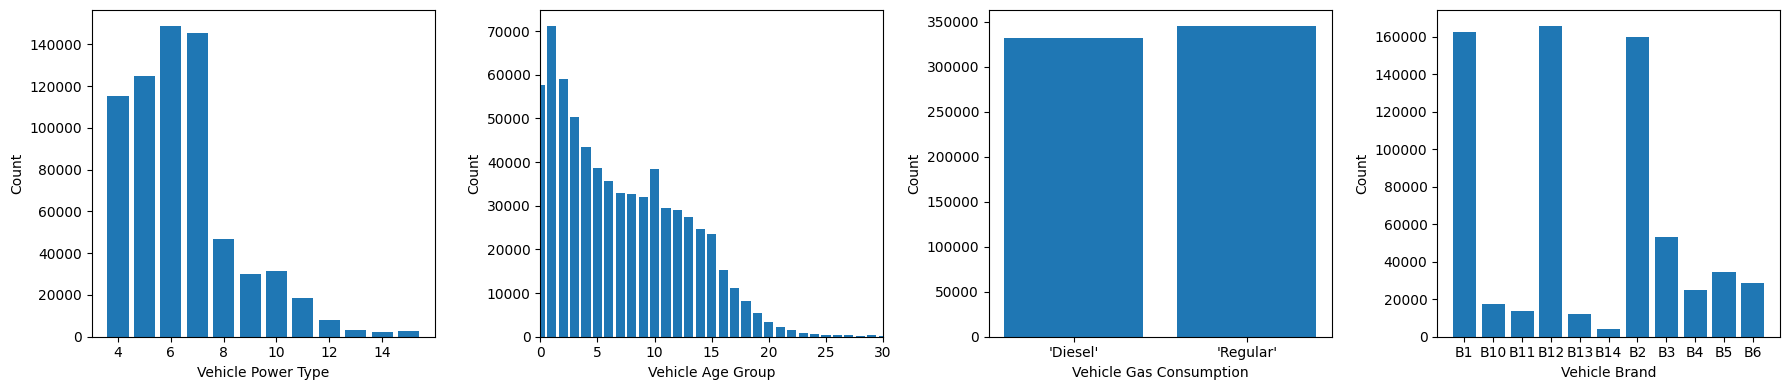

In [22]:
from matplotlib import colors

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

power = data_fre.data.groupby(by=['VehPower'], as_index=False).size()
power = power.rename(columns={'size':'Count'})
ax0.bar(power.VehPower, power.Count)
ax0.set_xlabel( 'Vehicle Power Type' )
ax0.set_ylabel( 'Count' )

vage = data_fre.data.groupby(by=['VehAge'], as_index=False).size()
vage = vage.rename(columns={'size':'Count'})
ax1.bar(vage.VehAge, vage.Count)
ax1.set_xlim([0,30])
ax1.set_xlabel( 'Vehicle Age Group' )
ax1.set_ylabel( 'Count' )    

vgas = data_fre.data.groupby(by=['VehGas'], as_index=False).size()
vgas = vgas.rename(columns={'size':'Count'})
ax2.bar(vgas.VehGas, vgas.Count)
ax2.set_xlabel( 'Vehicle Gas Consumption' )
ax2.set_ylabel( 'Count' )

vbrand = data_fre.data.groupby(by=['VehBrand'], as_index=False).size()
vbrand = vbrand.rename(columns={'size':'Count'})
ax3.bar(vbrand.VehBrand, vbrand.Count)
ax3.set_xlabel( 'Vehicle Brand' )
ax3.set_ylabel( 'Count' )


plt.tight_layout()
plt.show()

Distribution of Driver Age

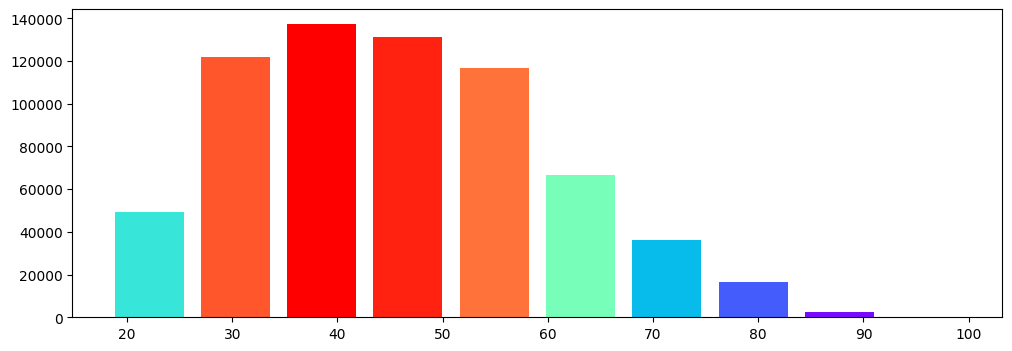

In [23]:
fig = plt.figure( figsize=(12, 4))

n, bins, patches = plt.hist( data_fre.data.DrivAge, density=False, rwidth=0.8)

from matplotlib import colors

fracs = n / n.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.rainbow(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.show()

#### Feature Scaling

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer


log_scale_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=False), 
    StandardScaler()
)

linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus"]),
        ("binned_numeric", KBinsDiscretizer(n_bins=10, subsample=int(2e5), random_state=0), 
         ["VehAge", "DrivAge"]),
        ("log_scaled_numeric", log_scale_transformer, ["Density"]),
        ("onehot_categorical", OneHotEncoder(), ["VehBrand","VehPower","VehGas","Region","Area"]),
    ],
    
    remainder="drop",
)


#### Data Split

In [25]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_fre, test_size=0.33, random_state=0)

## Part 3
### Baseline  Model  : Constant Prediction 

In [26]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline


base_model = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", DummyRegressor(strategy="mean")),
    ]
)

base_model.fit(
    df_train, 
    df_train["Frequency"], 
    regressor__sample_weight=df_train["Exposure"]
)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('passthrough_numeric',
                                                  'passthrough',
                                                  ['BonusMalus']),
                                                 ('binned_numeric',
                                                  KBinsDiscretizer(n_bins=10,
                                                                   random_state=0,
                                                                   subsample=200000),
                                                  ['VehAge', 'DrivAge']),
                                                 ('log_scaled_numeric',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Density']),
                                                 ('onehot_categorical',
                                                  OneHotEncoder(),
                                                  ['VehBrand', 'VehPower',
                                                   'VehGas', 'Region',
                                                   'Area'])])),
                ('regressor', DummyRegressor())])

#### Baseline Model Performance

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance


def score_estimator(estimator, df_test):
    """Score an estimator on the test set."""
    y_pred = estimator.predict(df_test)

    print(
        "MSE: %.3f"
        % mean_squared_error(
            df_test["Frequency"], y_pred, sample_weight=df_test["Exposure"]
        )
    )
    
    print(
        "MAE: %.3f"
        % mean_absolute_error(
            df_test["Frequency"], y_pred, sample_weight=df_test["Exposure"]
        )
    )

    # Ignore non-positive predictions, as they are invalid for the Poisson deviance.
    mask = y_pred > 0
    
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(
            "WARNING: Estimator yields invalid, non-positive predictions "
            f" for {n_masked} samples out of {n_samples}. These predictions "
            "are ignored when computing the Poisson deviance."
        )

    print(
        "Mean Poisson Deviance: %.3f"
        % mean_poisson_deviance(
            df_test["Frequency"][mask],
            y_pred[mask],
            sample_weight=df_test["Exposure"][mask],
        )
    )


print("Constant Mean Frequency Evaluation\n")
score_estimator(base_model, df_test)

Constant Mean Frequency Evaluation

MSE: 0.564
MAE: 0.189
Mean Poisson Deviance: 0.625


## Part 4
### Generalized Linear Model 

In [28]:
from sklearn.linear_model import Ridge

ridge_glm = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", Ridge(alpha=1e-6)),
    ]
)

ridge_glm.fit(
    df_train, 
    df_train["Frequency"], 
    regressor__sample_weight=df_train["Exposure"]
)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('passthrough_numeric',
                                                  'passthrough',
                                                  ['BonusMalus']),
                                                 ('binned_numeric',
                                                  KBinsDiscretizer(n_bins=10,
                                                                   random_state=0,
                                                                   subsample=200000),
                                                  ['VehAge', 'DrivAge']),
                                                 ('log_scaled_numeric',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Density']),
                                                 ('onehot_categorical',
                                                  OneHotEncoder(),
                                                  ['VehBrand', 'VehPower',
                                                   'VehGas', 'Region',
                                                   'Area'])])),
                ('regressor', Ridge(alpha=1e-06))])

In [29]:
print("Ridge Evaluation \n")
score_estimator(ridge_glm, df_test)

Ridge Evaluation 

MSE: 0.560
MAE: 0.186
Mean Poisson Deviance: 0.597


#### Fit Poisson Regressor

In [30]:
from sklearn.linear_model import PoissonRegressor

n_samples = df_train.shape[0]

poisson_glm = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", PoissonRegressor(alpha=1e-12, max_iter=300)),
    ]
)

poisson_glm.fit(
    df_train, 
    df_train["Frequency"], 
    regressor__sample_weight=df_train["Exposure"]
)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('passthrough_numeric',
                                                  'passthrough',
                                                  ['BonusMalus']),
                                                 ('binned_numeric',
                                                  KBinsDiscretizer(n_bins=10,
                                                                   random_state=0,
                                                                   subsample=200000),
                                                  ['VehAge', 'DrivAge']),
                                                 ('log_scaled_numeric',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Density']),
                                                 ('onehot_categorical',
                                                  OneHotEncoder(),
                                                  ['VehBrand', 'VehPower',
                                                   'VehGas', 'Region',
                                                   'Area'])])),
                ('regressor', PoissonRegressor(alpha=1e-12, max_iter=300))])

In [31]:
print("PoissonRegressor Evaluation \n")
score_estimator(poisson_glm, df_test)

PoissonRegressor Evaluation 

MSE: 0.560
MAE: 0.186
Mean Poisson Deviance: 0.594


#### Fit Gradient Boosting Regression Tree

In [32]:
from sklearn.preprocessing import OrdinalEncoder

tree_preprocessor = ColumnTransformer(
    [
        ("categorical", OrdinalEncoder(),["VehBrand", "VehPower", "VehGas", "Region", "Area"]),
        ("numeric", "passthrough", ["VehAge", "DrivAge", "BonusMalus", "Density"]),
    ],
    remainder="drop",
)

In [33]:
from sklearn.ensemble import HistGradientBoostingRegressor

poisson_gbrt = Pipeline(
    [
        ("preprocessor", tree_preprocessor),
        ("regressor", HistGradientBoostingRegressor(loss="poisson", max_leaf_nodes=128)),
    ]
)

poisson_gbrt.fit(
    df_train, df_train["Frequency"], regressor__sample_weight=df_train["Exposure"]
)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['VehBrand', 'VehPower',
                                                   'VehGas', 'Region',
                                                   'Area']),
                                                 ('numeric', 'passthrough',
                                                  ['VehAge', 'DrivAge',
                                                   'BonusMalus',
                                                   'Density'])])),
                ('regressor',
                 HistGradientBoostingRegressor(loss='poisson',
                                               max_leaf_nodes=128))])

In [34]:
print("Poisson Gradient Boosted Trees Evaluation \n")
score_estimator(poisson_gbrt, df_test)

Poisson Gradient Boosted Trees Evaluation 

MSE: 0.558
MAE: 0.183
Mean Poisson Deviance: 0.575


#### Model Performance

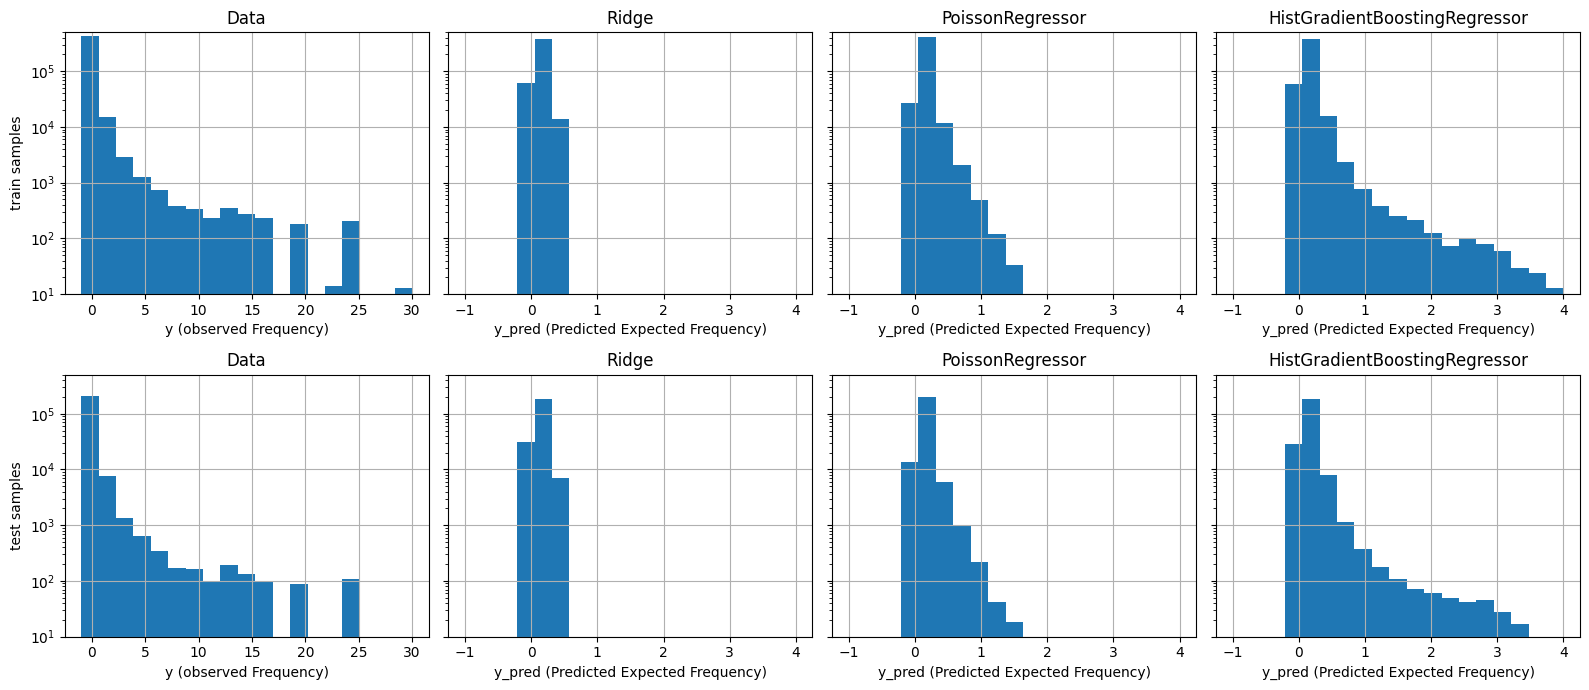

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,7), sharey=True)

fig.subplots_adjust(bottom=0.2)

n_bins = 20

for row_idx, label, df in zip(range(2), ["train", "test"], [df_train, df_test]):
    df["Frequency"].hist(bins=np.linspace(-1, 30, n_bins), ax=axes[row_idx, 0])

    axes[row_idx, 0].set_title("Data")
    axes[row_idx, 0].set_yscale("log")
    axes[row_idx, 0].set_xlabel("y (observed Frequency)")
    axes[row_idx, 0].set_ylim([1e1, 5e5])
    axes[row_idx, 0].set_ylabel(label + " samples")

    for idx, model in enumerate([ridge_glm, poisson_glm, poisson_gbrt]):
        y_pred = model.predict(df)

        pd.Series(y_pred).hist(
            bins=np.linspace(-1, 4, n_bins), ax=axes[row_idx, idx + 1]
        )
        axes[row_idx, idx + 1].set(
            title=model[-1].__class__.__name__,
            yscale="log",
            xlabel="y_pred (Predicted Expected Frequency)",
        )

plt.tight_layout()

### Evaluation of the Calibration of Predictions

In [36]:
from sklearn.utils import gen_even_slices

def mean_frequency_by_risk_group(y_true, y_pred, sample_weight=None, n_bins=100):

    idx_sort = np.argsort(y_pred)
    bin_centers = np.arange(0, 1, 1 / n_bins) + 0.5 / n_bins
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)

    for n, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        weights = sample_weight[idx_sort][sl]
        y_pred_bin[n] = np.average(y_pred[idx_sort][sl], weights=weights)
        y_true_bin[n] = np.average(y_true[idx_sort][sl], weights=weights)
    return bin_centers, y_true_bin, y_pred_bin

In [37]:
print(f"Actual number of claims: {df_test['ClaimNb'].sum()}")

Actual number of claims: 11935


Predicted number of claims by Ridge(alpha=1e-06): 11933.4
Predicted number of claims by PoissonRegressor(alpha=1e-12, max_iter=300): 11932.9
Predicted number of claims by HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=128): 12112.2
Predicted number of claims by DummyRegressor(): 11931.2


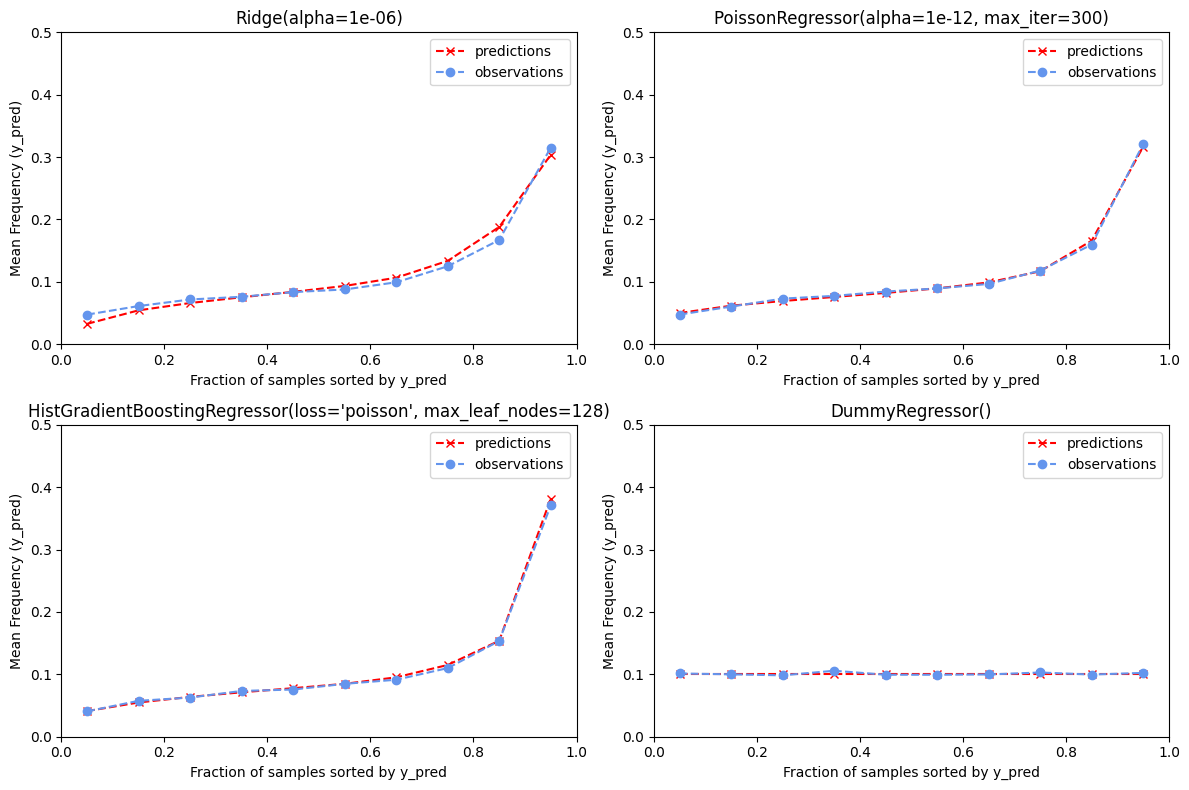

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

for axi, model in zip(ax.ravel(), [ridge_glm, poisson_glm, poisson_gbrt, base_model]):
    y_pred = model.predict(df_test)
    y_true = df_test["Frequency"].values
    exposure = df_test["Exposure"].values
    q, y_true_seg, y_pred_seg = mean_frequency_by_risk_group(
        y_true, y_pred, sample_weight=exposure, n_bins=10
    )

    # Name of the model after the estimator used in the last step of the
    # pipeline.
    print(f"Predicted number of claims by {model[-1]}: {np.sum(y_pred * exposure):.1f}")

    axi.plot(q, y_pred_seg, marker="x", linestyle="--", label="predictions", color="red")
    axi.plot(q, y_true_seg, marker="o", linestyle="--", label="observations", color="cornflowerblue")
    axi.set_xlim(0, 1.0)
    axi.set_ylim(0, 0.5)
    axi.set(
        title=model[-1],
        xlabel="Fraction of samples sorted by y_pred",
        ylabel="Mean Frequency (y_pred)",
    )
    axi.legend()
    
plt.tight_layout()

### Model Evaluation 

#### Ranking by Gini  Index

In [39]:
from sklearn.metrics import auc

def lorenz_curve(y_true, y_pred, exposure):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    exposure = np.asarray(exposure)

    # order samples by increasing predicted risk
    ranking = np.argsort(y_pred)
    ranked_frequencies = y_true[ranking]
    ranked_exposure = exposure[ranking]
    cumulated_claims = np.cumsum(ranked_frequencies * ranked_exposure)
    cumulated_claims /= cumulated_claims[-1]
    cumulated_exposure = np.cumsum(ranked_exposure)
    cumulated_exposure /= cumulated_exposure[-1]
    
    return cumulated_exposure, cumulated_claims

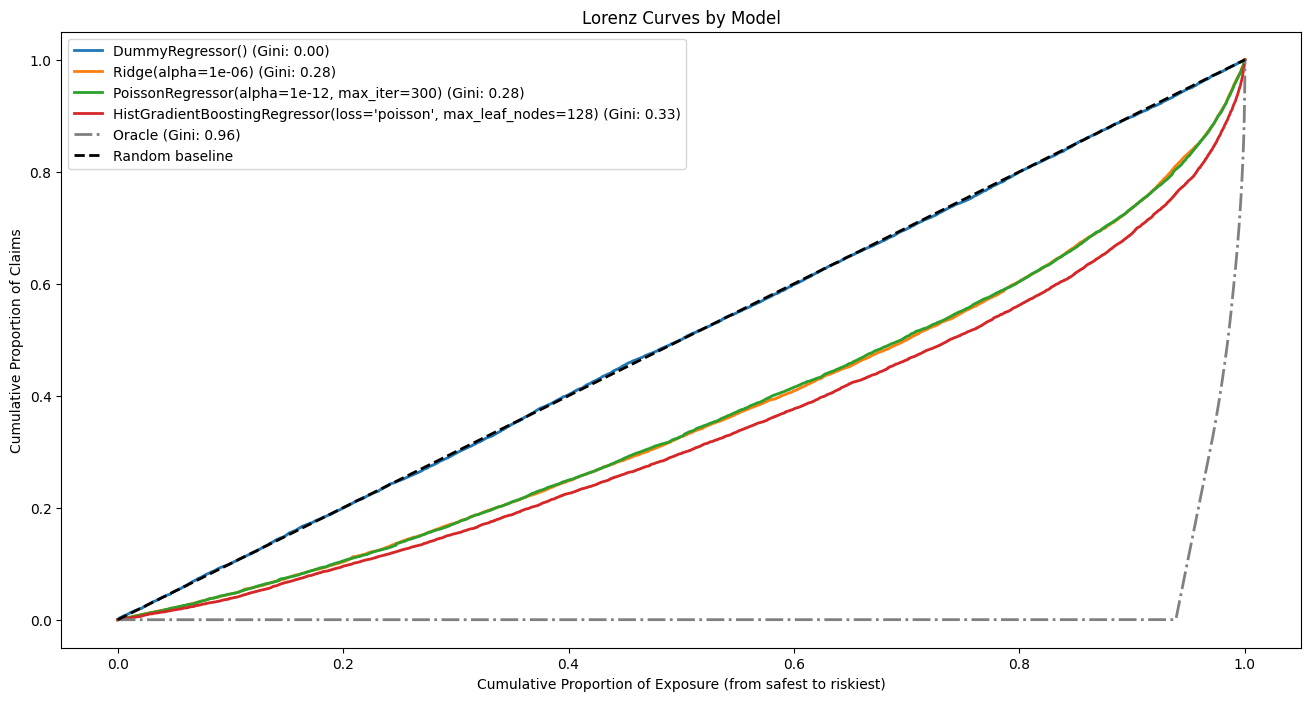

In [40]:
fig, ax = plt.subplots( figsize=(16, 8) )

# base_model, ridge_glm, poisson_glm, poisson_gbrt
for model in [base_model, ridge_glm, poisson_glm, poisson_gbrt]:
    y_pred = model.predict(df_test)
    
    cum_exposure, cum_claims = lorenz_curve(
        df_test["Frequency"], y_pred, df_test["Exposure"]
    )
    
    gini = 1 - 2 * auc(cum_exposure, cum_claims)
    
    label = "{} (Gini: {:.2f})".format(model[-1], gini)
    ax.plot(cum_exposure, cum_claims, linestyle="-", label=label, linewidth=2)

    
# Oracle model: y_pred == y_test
cum_exposure, cum_claims = lorenz_curve(
    df_test["Frequency"], df_test["Frequency"], df_test["Exposure"]
)

gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "Oracle (Gini: {:.2f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-.", color="gray", label=label, linewidth=2)


# Random Baseline
ax.plot([0,1], [0,1], linestyle="--", color="black", label="Random baseline", linewidth=2)
ax.set(
    title="Lorenz Curves by Model",
    xlabel="Cumulative Proportion of Exposure (from safest to riskiest)",
    ylabel="Cumulative Proportion of Claims",
)

ax.legend(loc="upper left")

plt.show()